# Naive Bayes

**Bayes Theorem:** $P(A|B) = \dfrac{P(B|A) * P(A)}{P(B)}$

Naive Bayes Classifier implements **Bayes theorem** to classify the new data point. Here is one example how it actually works.

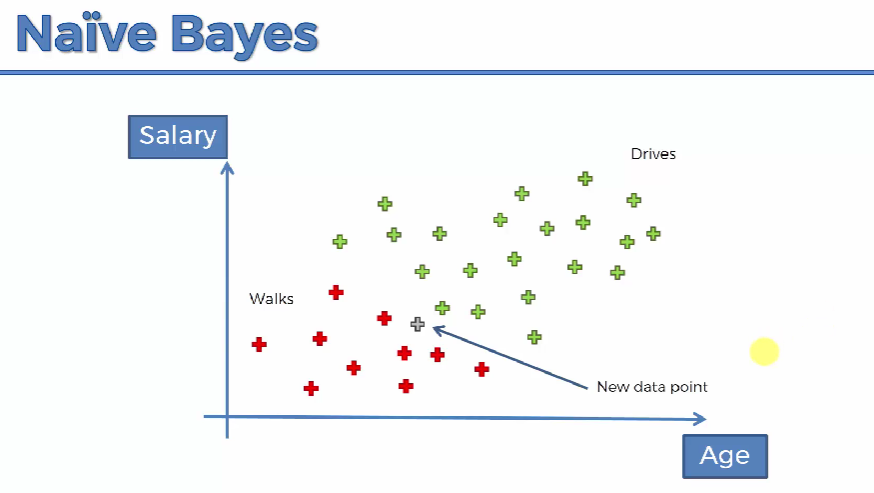



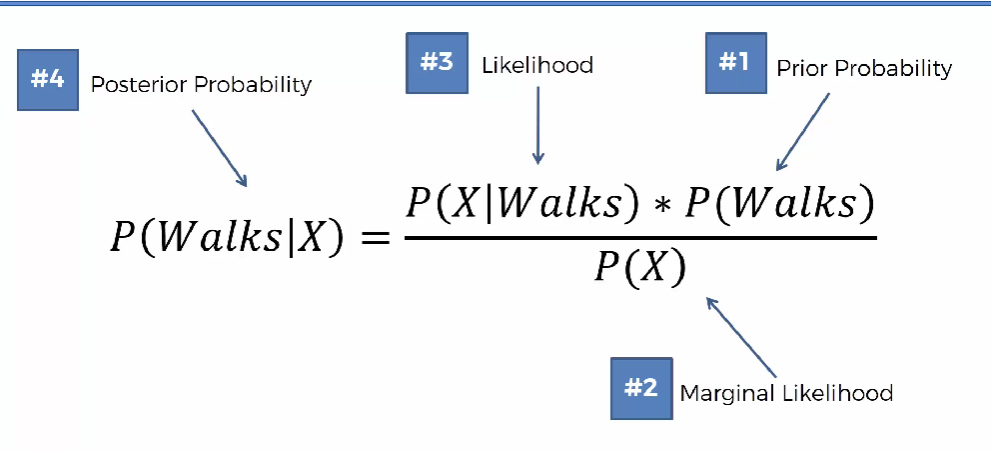

The basic idea behind this classifier is that **calculate the probability of this new data point belongs to each category given the features provided by the new data point while the one with the maximum probability becomes the class of this new data point.** Take the above as an example, the **prior probablity** would be the **probability of walking among the all observations**; the **marginal likelihood** would be the probability of having these features among all the observations **(in this case $P(X)=P(Age=X_1, Salary=X_2)$);** the **likelihood** would be the **probability of having these features given that it is in the category of walking**. Then we could calculate the probability of walking given the features provided by the new data point which is desired result. Similarly, repeat the above procedure for each category and choose the maximum one.

***Why Naive?*** Because it means **assuming features are independent** which means that $P(A,B) = P(A)P(B)$ and this allows for convenient calculation. In above example, it would be demonstrated as $P(Age=X_1, Salary=X_2) = P(Age=X_1)P(Salary=X_2)$.

If features are **categorical**, we can use **Multinomial Naive Bayes** for instance.<br>
If features are **continuous**, we can use **Gaussian Naïve Bayes** (this model also assumes each feature is **normally distributed**) for instance.

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
#Note: feature scaling is not necessary for Naive Bayes classifier
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Naive Bayes model on the Training set

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

## Predicting a new result

In [ ]:
print(classifier.predict(sc.transform([[30, 87000]])))

[0]


## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)

## Making the Confusion Matrix

0.9

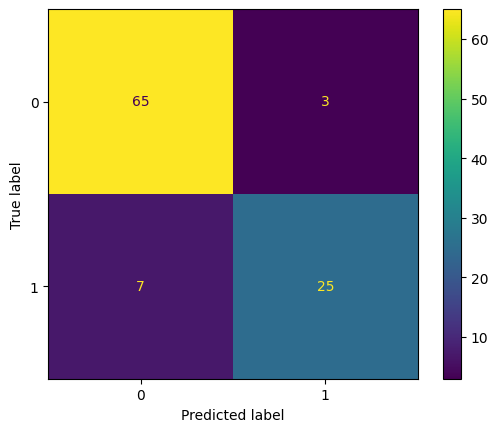

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1]).plot()
accuracy_score(y_test, y_pred)

## Visualising the Training set results

<ipython-input-10-3cd077afbcb2>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1], c=ListedColormap(('salmon', 'dodgerblue'))(i), label=j)


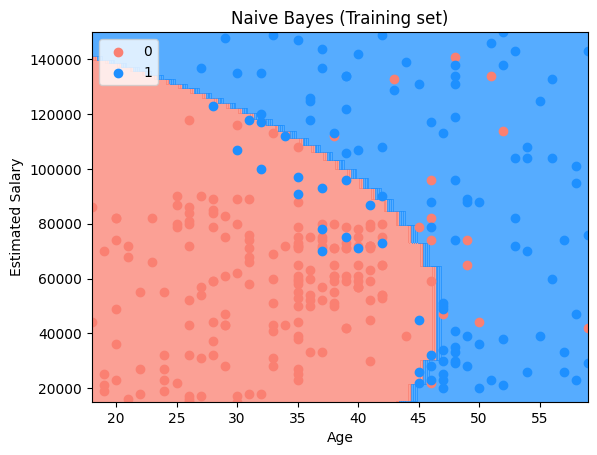

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min(), stop=X_set[:,0].max(), step=1),
                     np.arange(start=X_set[:,1].min(), stop=X_set[:,1].max(), step=1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1], c=ListedColormap(('salmon', 'dodgerblue'))(i), label=j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results

<ipython-input-11-d9a401a59c9f>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1], c=ListedColormap(('salmon', 'dodgerblue'))(i), label=j)


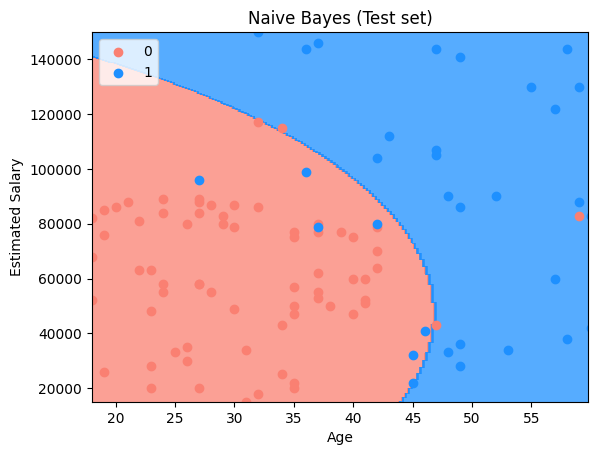

In [ ]:
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min(), stop=X_set[:,0].max(), step=0.25),
                     np.arange(start=X_set[:,1].min(), stop=X_set[:,1].max(), step=0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1], c=ListedColormap(('salmon', 'dodgerblue'))(i), label=j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()